In [17]:
from datasets import load_dataset
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import re

In [3]:
ds = load_dataset("Salesforce/wikitext", "wikitext-2-v1")


In [4]:
ds

DatasetDict({
    test: Dataset({
        features: ['text'],
        num_rows: 4358
    })
    train: Dataset({
        features: ['text'],
        num_rows: 36718
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3760
    })
})

In [5]:
train_ds = ds["train"]
test_ds = ds["test"]
val_ds = ds["validation"]

In [12]:
train_df = pd.DataFrame(train_ds)
test_df = pd.DataFrame(test_ds)
val_df = pd.DataFrame(val_ds)

In [13]:
train_df

,text
0,
1,= Valkyria Chronicles III = \n
2,
3,Senjō no Valkyria 3 : <unk> Chronicles ( Japa...
4,"The game began development in 2010 , carrying..."
...,...
36713,Common starlings may be kept as pets or as la...
36714,The common starling 's gift for mimicry has l...
36715,Mozart had a pet common starling which could ...
36716,Common starlings are trapped for food in some...


In [16]:
df = pd.concat([train_df, test_df, val_df])
print(len(df)) 
df.head()

44836


,text
0,
1,= Valkyria Chronicles III = \n
2,
3,Senjō no Valkyria 3 : <unk> Chronicles ( Japa...
4,"The game began development in 2010 , carrying..."


In [18]:
def normalizer(s: str):
    s = s.lower()
    s = re.sub(r'[^a-z\s]', '', s)
    s = re.sub(r'\s+', ' ', s)
    s = s.strip()
    return s

In [19]:
df["text"] = df["text"].apply(normalizer)

In [24]:
df.index.max()

36716

In [21]:
df.drop(df[df["text"] == ""].index, inplace=True)

In [ ]:
df.dropna

In [22]:
df

,text
1,valkyria chronicles iii
3,senjō no valkyria unk chronicles japanese 戦場のヴ...
11,troops are divided into five classes scouts un...
17,unk due to these events and partly due to the ...
22,the majority of material created for previous ...
...,...
3719,early life
3730,unk city
3733,unk signed a three year contract to play unk a...
3739,throughout her career unk has been outspoken o...


In [25]:
df.reset_index(drop=True, inplace=True)

In [27]:
df.to_csv("data/train.csv", index=False)

<Axes: >

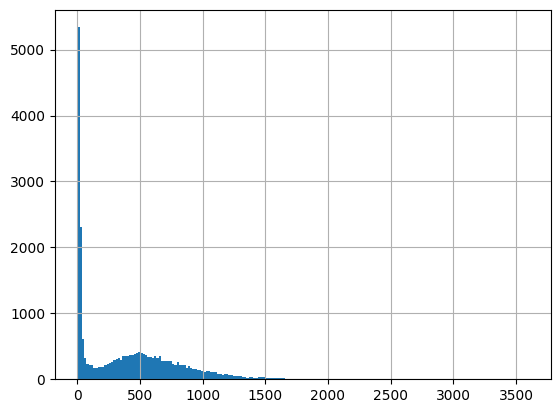

In [29]:
df['text'].str.len().hist(bins=200)